In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
#color_pad = plt.rcParams['axes.prod_cycle'].by_key()['color']
from fredapi import Fred

In [3]:
#set Fred api key
fred_key = '635735e8d833607369c43a9d7f98dcd9'
fred = Fred(fred_key)

In [4]:
sp_search = fred.search('S&P', order_by='realtime_end')

In [5]:
sp500 = fred.get_series('SP500')

<Axes: title={'center': 'S&P 500'}>

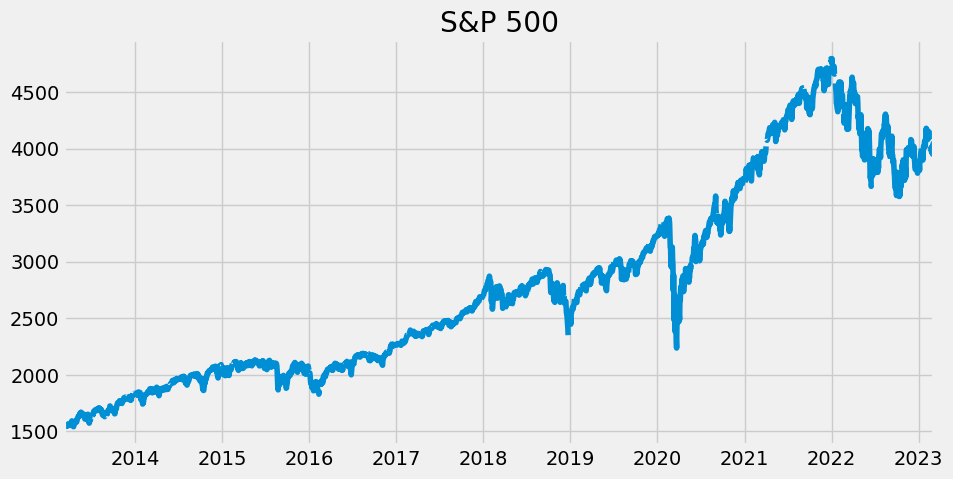

In [6]:
sp500.plot(figsize=(10,5), title='S&P 500')

In [7]:
unemp_rates = fred.search('unemployment')

In [8]:
unrate = fred.get_series('UNRATE')

<Axes: >

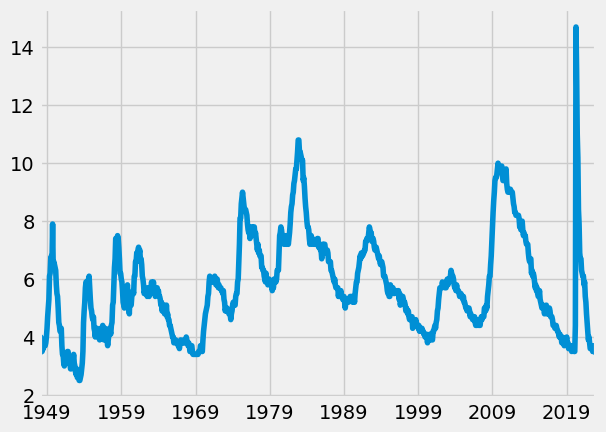

In [9]:
unrate.plot()

In [10]:
unemp_df=fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

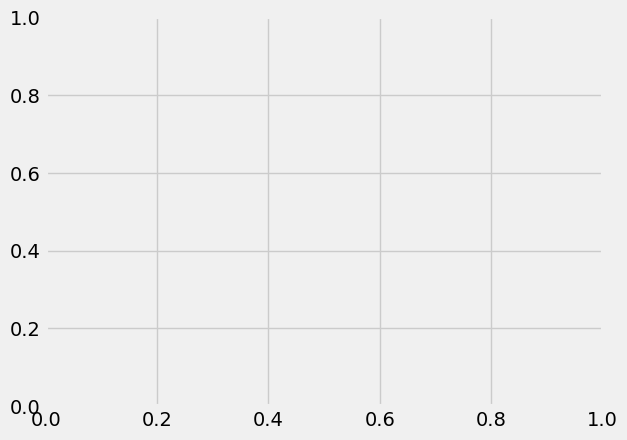

In [11]:
fig, ax = plt.subplots()

In [12]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df['title'] = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-03-09   2023-03-09   
LNS14000006            LNS14000006     2023-03-09   2023-03-09   
CAUR                          CAUR     2023-03-09   2023-03-09   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-03-09   2023-03-09   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-03-09   2023-03-09   
...                            ...            ...          ...   
LNS14100000            LNS14100000     2023-03-09   2023-03-09   
LNS14023705            LNS14023705     2023-03-09   2023-03-09   
LNS14000025            LNS14000025     2023-03-09   2023-03-09   
DSUR                          DSUR     2023-03-09   2023-03-09   
LNS14023569            LNS14023569     2023-03-09   2023-03-09   

                                                          title  \
series id                                                         
UNRATE                                        Unemployment Rate   
LNS14000006       Unemployment Rate - Black or African American   
CAUR                                                 California   
M0892AUSM156SNBR            Unemployment Rate for United States   
M0892BUSM156SNBR            Unemployment Rate for United States   
...                                                         ...   
LNS14100000                 Unemployment Rate Full-Time Workers   
LNS14023705                     Unemployment Rate - Job Leavers   
LNS14000025             Unemployment Rate - 20 Yrs. & over, Men   
DSUR               FRB-St. Louis District States (DISCONTINUED)   
LNS14023569                    Unemployment Rate - New Entrants   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-01-01   Monthly               M   
LNS14000006             1972-01-01      2023-01-01   Monthly               M   
CAUR                    1976-01-01      2022-12-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14100000             1968-01-01      2023-01-01   Monthly               M   
LNS14023705             1967-01-01      2023-01-01   Monthly               M   
LNS14000025             1948-01-01      2023-01-01   Monthly               M   
DSUR                    1976-01-01      2008-12-01   Monthly               M   
LNS14023569             1967-01-01      2023-01-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14100000       Percent           %  Seasonally Adjusted   
LNS14023705       Percent           %  Seasonally Adjusted   
LNS14000025       Percent           %  Seasonally Adjusted   
DSUR              Percent           %  Seasonally Adjusted   
LNS14023569       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-02-03 07:44:02-06:00   
LNS14000006                             SA  2023-02-03 07:44:12-06:00   
CAUR                                    SA  2023-01-25 08:27:02-06:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:06-05:00   
M0892BUSM156SNB

In [28]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1)

In [29]:
unemp_results = unemp_results.drop('UNRATE', axis=1)
unemp_results = unemp_results.drop('M0892AUSM156SNBR', axis=1)
unemp_results = unemp_results.drop('M0892BUSM156SNBR', axis=1)
unemp_results = unemp_results.drop('LRHUTTTTUSM156S', axis=1)
unemp_results = unemp_results.drop('U2RATE', axis=1)
unemp_results = unemp_results[unemp_results.columns.drop(list(unemp_results.filter(regex='LASMT')))]
unemp_results = unemp_results[unemp_results.columns.drop(list(unemp_results.filter(regex='LRUN')))]
unemp_states = unemp_results[unemp_results.columns.drop(list(unemp_results.filter(regex='LNS')))]
unemp_states

CAUR  FLUR  TXUR  NYUR  PAUR  OHUR  NCUR  MIUR  ILUR  GAUR  ...  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2022-09-01   3.8   2.5   4.0   4.3   4.1   4.0   3.6   4.1   4.5   2.8  ...   
2022-10-01   4.0   2.7   4.0   4.3   4.0   4.2   3.8   4.2   4.6   2.9  ...   
2022-11-01   4.1   2.6   4.0   4.3   4.0   4.2   3.9   4.3   4.7   3.0  ...   
2022-12-01   4.1   2.5   3.9   4.3   3.9   4.2   3.9   4.3   4.7   3.0  ...   
2023-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

            DCUR  MEUR  DEUR  VTUR  WYUR  CMWRUR  CWSTUR  CNERUR  CSOUUR  DSUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  
1929-06-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  
1929-07-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  
1929-08-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  
...          ...   ...   ...   ...   ...     ...     ...     ...     ...   ...  
2022-09-01   4.7   3.3   4.3   2.1   3.3     3.4     3.7     3.9     3.3   NaN  
2022-10-01   4.8   3.6   4.3   2.3   3.5     3.5     3.8     3.9     3.4   NaN  
2022-11-01   4.6   3.7   4.4   2.5   3.6     3.6     3.9     3.8     3.4   NaN  
2022-12-01   4.7   3.8   4.4   2.6   3.7     3.6     3.8     3.7     3.4   NaN  
2023-01-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  

[1114 rows x 57 columns]

In [30]:
id_to_state = unemp_df['title']
#unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [35]:
unemp_states = unemp_states[index >= '1976-01-01']

NameError: name 'index' is not defined

In [31]:
px.line(unemp_states)

In [32]:
unemp_states.head()

CAUR  FLUR  TXUR  NYUR  PAUR  OHUR  NCUR  MIUR  ILUR  GAUR  ...  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

            DCUR  MEUR  DEUR  VTUR  WYUR  CMWRUR  CWSTUR  CNERUR  CSOUUR  DSUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  
1929-06-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  
1929-07-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  
1929-08-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   NaN  

[5 rows x 57 columns]

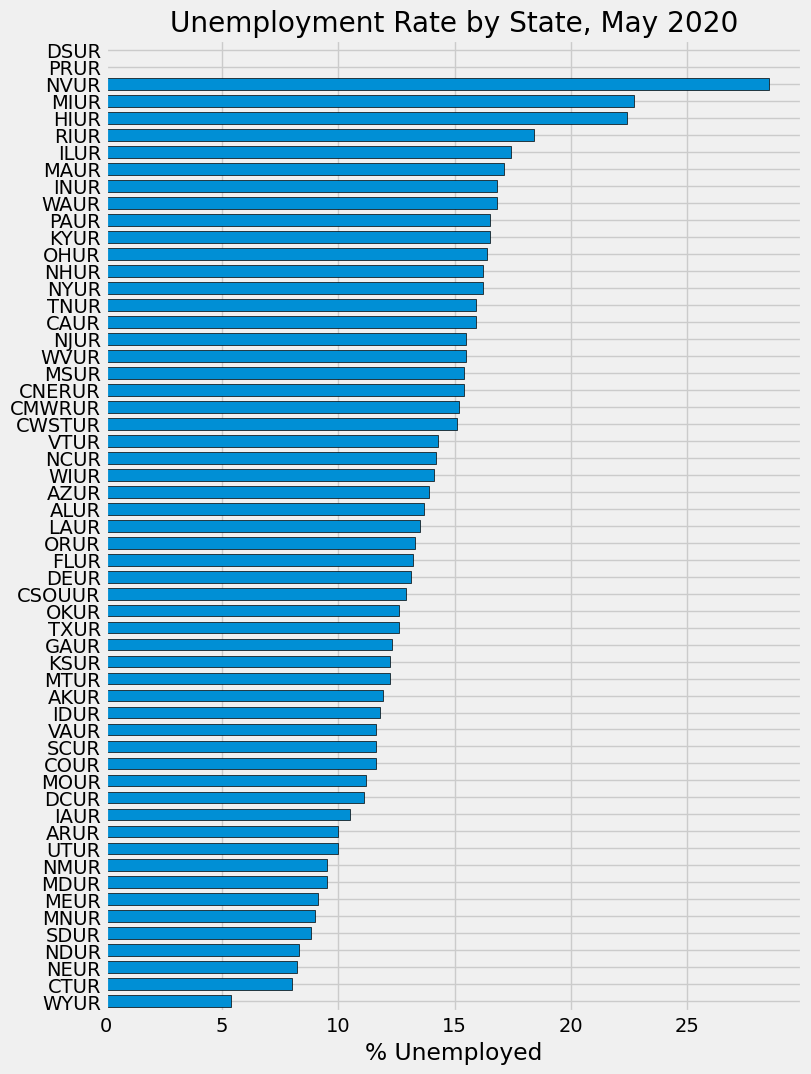

In [34]:
#locate April 1st row and transform the data set
ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, April 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Participation Rate

In [43]:
df = fred.search('participation rate state', filter=('frequency','Monthly'))
df = df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [44]:
part_id_to_state = df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
all_results = []
for myid in df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [45]:
#Rename DC
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

KeyError: 'North Dakota'

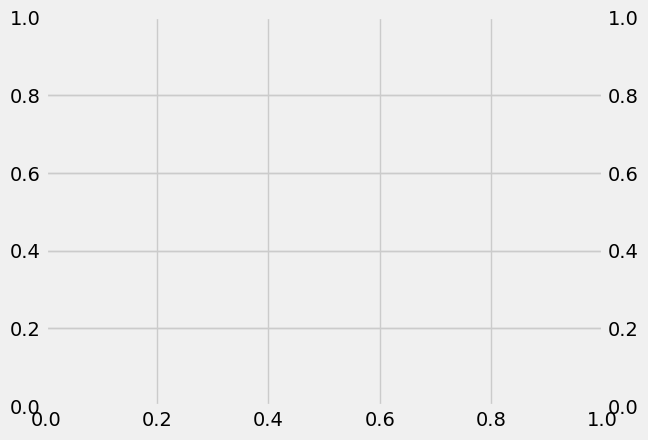

In [46]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index>=1975')['North Dakota'] \
    .plot(ax=ax2, label='Unemployment', color='blue')
part_states.query('index>=1975')['North Dakota'] \
    .plot(ax=ax2, label='Participation', color='red')
ax2.grid(False)
ax2.set_title('North Dakota')
ax2.set_ylabel('unemployment rate')